<a href="https://colab.research.google.com/github/kushagrasharma-13/Artificial_Neural_network/blob/main/ANN_OnlineShoppers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANN on Online Shoppers Data-set

Confusion Matrix

Classification Report

Accuracy, Precision, Recall, F1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [ ]:
# Load Online_Shoppers_Intention.csv
dataset = pd.read_csv("/content/drive/MyDrive/Python/Datasets/Online_Shoppers_Intention.csv")

In [ ]:
dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
corr = dataset.corr()
corr.style.background_gradient(cmap = 'coolwarm')

<ipython-input-7-ffd37e1235a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [ ]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

Text(0.5, 1.0, 'Count of visitors based on revenue generated')

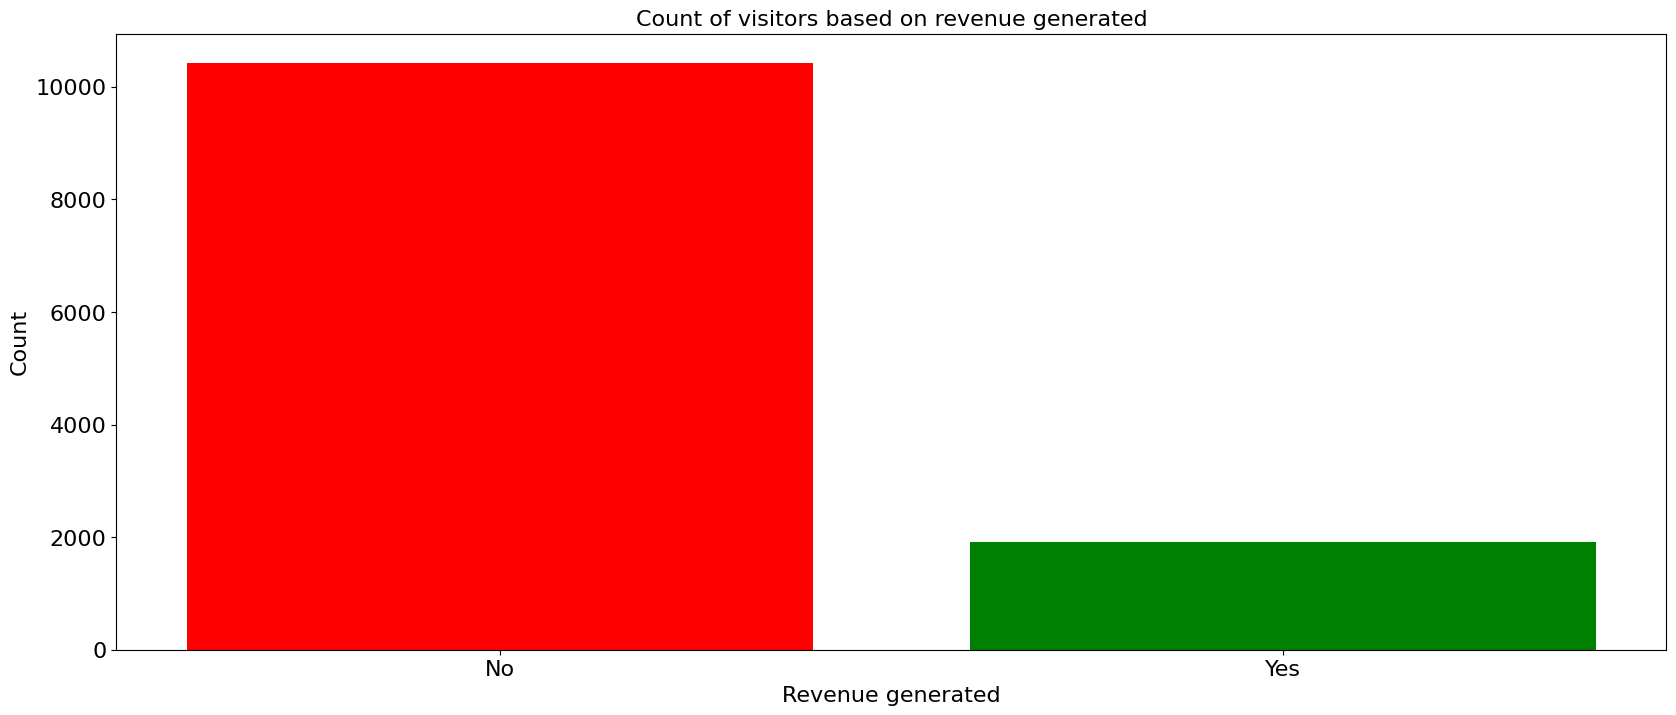

In [ ]:
target_distribution = y.value_counts()

plt.figure(figsize = (20, 8))
plt.bar(target_distribution.keys().tolist(), target_distribution.tolist(), color = ['red', 'green'])

plt.xlabel('Revenue generated', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks([0.0, 1.0], ['No', 'Yes'], fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Count of visitors based on revenue generated', fontsize = 16)

In [ ]:
x = x.drop(['Administrative', 'Informational', 'ProductRelated'], axis=1)

In [ ]:
x.drop(['OperatingSystems', 'Region', 'TrafficType'], axis=1, inplace=True)

In [ ]:
LE = LabelEncoder()
x.loc[:, 'Month'] = LE.fit_transform(x.loc[:, 'Month'])
x.loc[:, 'VisitorType'] = LE.fit_transform(x.loc[:, 'VisitorType'])
x.loc[:, 'Weekend'] = LE.fit_transform(x.loc[:, 'Weekend'])

<ipython-input-12-f7d99a8c7037>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:, 'Month'] = LE.fit_transform(x.loc[:, 'Month'])
<ipython-input-12-f7d99a8c7037>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:, 'VisitorType'] = LE.fit_transform(x.loc[:, 'VisitorType'])


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.reset_index(inplace = True)
x_test.reset_index(inplace = True)

In [ ]:
OE = OneHotEncoder(categories = 'auto', drop = 'first')
train_cat_features = OE.fit_transform(x_train.loc[:, ['Month', 'Browser', 'VisitorType']]).toarray()
train_cat_features = pd.DataFrame(train_cat_features)
test_cat_features = OE.transform(x_test.loc[:, ['Month', 'Browser', 'VisitorType']]).toarray()
test_cat_features = pd.DataFrame(test_cat_features)

x_train.drop(['Month', 'Browser', 'VisitorType'], axis = 1, inplace = True)
x_train = x_train.join(train_cat_features)
x_test.drop(['Month', 'Browser', 'VisitorType'], axis = 1, inplace = True)
x_test = x_test.join(test_cat_features)

In [ ]:
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

In [ ]:
SC = StandardScaler()
x_train = SC.fit_transform(x_train)
x_test = SC.fit_transform(x_test)

In [ ]:
model = Sequential()
model.add(Dense(units = 128, activation = 'relu', input_dim = 32))
model.add(Dropout(rate = 0.6))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(rate = 0.6))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(rate = 0.6))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(rate = 0.4))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 50, shuffle = False, validation_split = 0.1)

Epoch 1/50
278/278 [==============================] - 2s 9ms/step - loss: 0.2361 - accuracy: 0.9015 - val_loss: 0.2192 - val_accuracy: 0.9027
Epoch 2/50
278/278 [==============================] - 1s 3ms/step - loss: 0.2403 - accuracy: 0.9027 - val_loss: 0.2229 - val_accuracy: 0.9017
Epoch 3/50
278/278 [==============================] - 1s 4ms/step - loss: 0.2300 - accuracy: 0.9037 - val_loss: 0.2240 - val_accuracy: 0.9007
Epoch 4/50
278/278 [==============================] - 1s 4ms/step - loss: 0.2289 - accuracy: 0.9075 - val_loss: 0.2243 - val_accuracy: 0.8987
Epoch 5/50
278/278 [==============================] - 1s 4ms/step - loss: 0.2281 - accuracy: 0.9058 - val_loss: 0.2224 - val_accuracy: 0.9037
Epoch 6/50
278/278 [==============================] - 1s 3ms/step - loss: 0.2319 - accuracy: 0.9063 - val_loss: 0.2324 - val_accuracy: 0.8977
Epoch 7/50
278/278 [==============================] - 1s 3ms/step - loss: 0.2321 - accuracy: 0.9058 - val_loss: 0.2344 - val_accuracy: 0.8956
Epoch 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               4224      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [ ]:
y_pred = model.predict(x_test)
y_pred = y_pred > 0.5

78/78 [==============================] - 0s 926us/step


In [ ]:
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

Confusion matrix: 
[[1960   95]
 [ 182  229]]


In [ ]:
print("Classification Report: ")
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

       False       0.92      0.95      0.93      2055
        True       0.71      0.56      0.62       411

    accuracy                           0.89      2466
   macro avg       0.81      0.76      0.78      2466
weighted avg       0.88      0.89      0.88      2466



In [ ]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Precision: {:.2f}%".format(precision_score(y_test, y_pred)*100))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred)*100))
print("F1_score: {:.2f}%".format(f1_score(y_test, y_pred)*100))

Accuracy: 88.77%
Precision: 70.68%
Recall: 55.72%
F1_score: 62.31%
